In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib as mpl
from shared import get_figdir

FIGDIR = get_figdir('02-background')

# Use latex for matplotlib text
mpl.rc('text', usetex=True)
FIGDIR

PosixPath('/Users/marcel/school/msc-thesis/fig/02-background')

/opt/homebrew/Caskroom/miniforge/base/envs/3.10/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


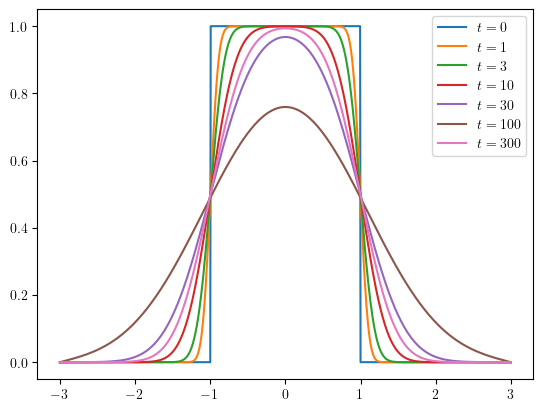

In [3]:
# Define the heat equation with proper boundary conditions
def heat_eqn(u, t, D):
    du = np.zeros_like(u)
    du[1:-1] = D * (u[2:] - 2 * u[1:-1] + u[:-2])
    du[0] = 0
    du[-1] = 0
    return du

# Initial conditions are 1 from -1 to 1 and zero elsewhere
N_points = 1000
x = np.linspace(-3, 3, N_points)
u0 = np.zeros_like(x)
u0[(x > -1) & (x < 1)] = 1

# Define end times
end_times = [0, 1, 3, 10, 30, 100, 300]

diffusion_coeff = 100

# Solve the heat equation for each end time
for end_time in end_times:
    # Solve the heat equation
    u = odeint(heat_eqn, u0, [0, end_time], args=(diffusion_coeff,))

    # Plot the solution
    plt.plot(x, u[-1], label=f'$t = {end_time}$')

# Add legend for the end times
plt.legend()

plt.savefig(FIGDIR / 'heat_eqn.pdf')
plt.show()

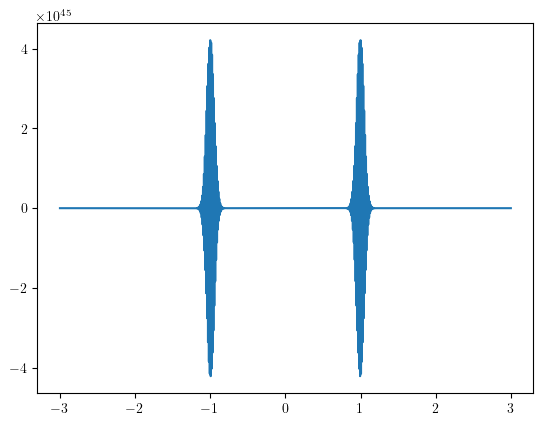

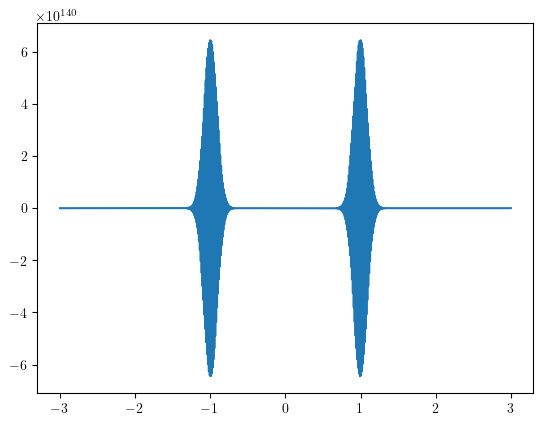

/var/folders/bd/847y_93d4tl6nwdgxdzs7lgm0000gn/T/ipykernel_32029/2082467848.py:6: RuntimeWarning: overflow encountered in multiply
  du[1:-1] = D * (u[2:] - 2 * u[1:-1] + u[:-2])
/var/folders/bd/847y_93d4tl6nwdgxdzs7lgm0000gn/T/ipykernel_32029/2082467848.py:33: RuntimeWarning: invalid value encountered in add
  u[i + 1] = u[i] + dt * wave_eqn(u[i], t[i], diffusion_coeff)
/var/folders/bd/847y_93d4tl6nwdgxdzs7lgm0000gn/T/ipykernel_32029/2082467848.py:6: RuntimeWarning: invalid value encountered in subtract
  du[1:-1] = D * (u[2:] - 2 * u[1:-1] + u[:-2])


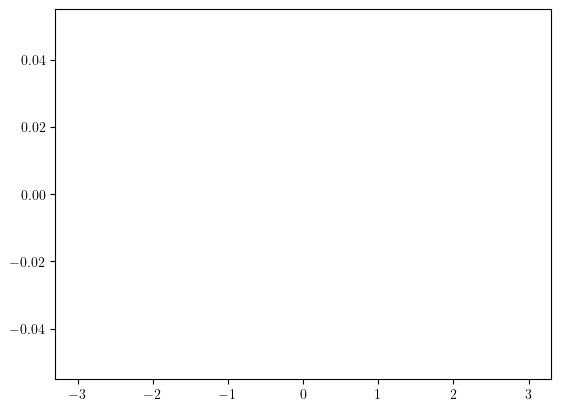

/var/folders/bd/847y_93d4tl6nwdgxdzs7lgm0000gn/T/ipykernel_32029/2082467848.py:6: RuntimeWarning: overflow encountered in multiply
  du[1:-1] = D * (u[2:] - 2 * u[1:-1] + u[:-2])
/var/folders/bd/847y_93d4tl6nwdgxdzs7lgm0000gn/T/ipykernel_32029/2082467848.py:33: RuntimeWarning: invalid value encountered in add
  u[i + 1] = u[i] + dt * wave_eqn(u[i], t[i], diffusion_coeff)
/var/folders/bd/847y_93d4tl6nwdgxdzs7lgm0000gn/T/ipykernel_32029/2082467848.py:6: RuntimeWarning: invalid value encountered in subtract
  du[1:-1] = D * (u[2:] - 2 * u[1:-1] + u[:-2])


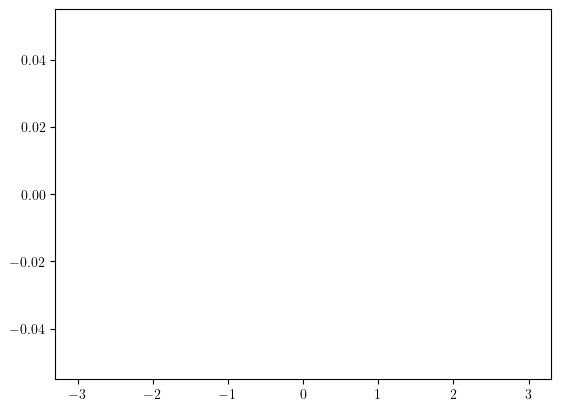

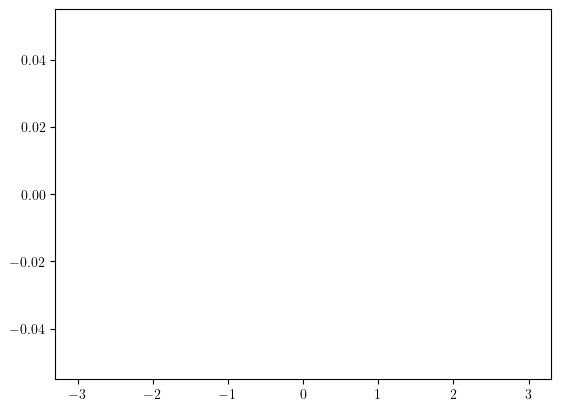

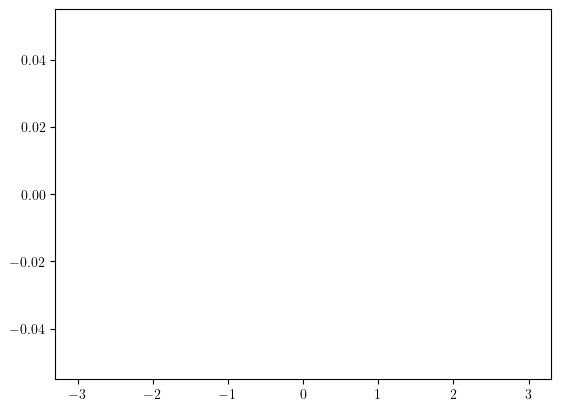